In [3]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [4]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [6]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


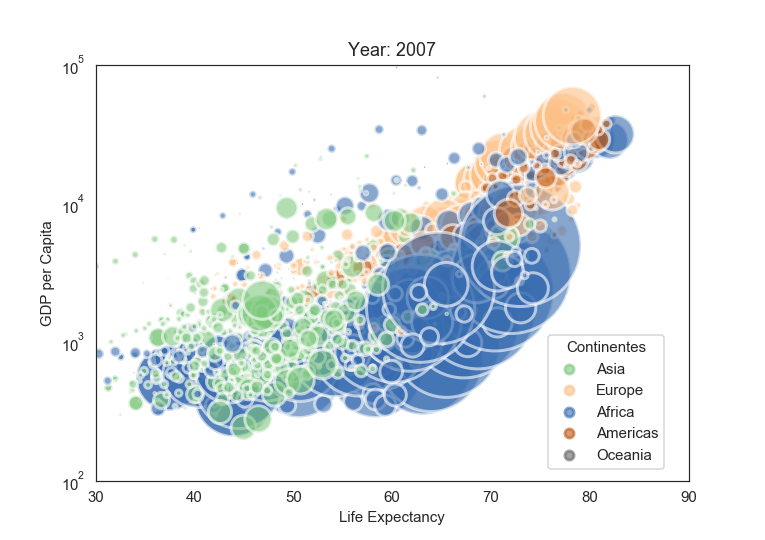

In [7]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)




def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    #Criar legenda
    c= data.continent.unique()
    legend = ax.legend(handles= scut.legend_elements()[0], title= "Continentes", labels= c, bbox_to_anchor=(0.75, 0.01, 0, 1))
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)


    
plt.show()

<strong>Questão A-</strong> Explique a metodologia para criar a animação em cada um dos casos (versões). Comente-as. Justifique.

Os dois codigos iniciam da mesma forma, começando por importar as bibliotecas necessárias, exportam o documento de dados de um ficheiro csv online, executam a função head() para ver as primeiras 5 linhas do csv, definem que os dados da coluna 'continent' serão transformados em numeros e definem-se as legendas da figura/gráfico.

No ficheiro 'gapminder_animation.ipynb' os graficos sao gerados através de um ciclo for criando um grafico para cada ano.
guardando os graficos na variavel 'filename'. Por fim guarda o grafico novamente mas usa a função plt.savefig para redimencionar a imagem para 96 dpi´s   
De seguida guarda as figuras criadas numa variável chamada 'filename'= 'Gapminder_step'+str(i)+'.png, somando a cada imagem +i, 

No ficheiro 'gapminder_animation-FuncAnimation_PLOT_SEM-legend', a imagem é produzida em formato GIF, usando a função animation.FuncAnimation., em que o número de frames corresponde ao número de anos da coluna 'year', com um intervalo entre frames de 200 (número assumido por defeito).

<strong>Questão B-</strong> Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

In [8]:
c= data.continent.unique()

print(c)

[Asia, Europe, Africa, Americas, Oceania]
Categories (5, object): [Asia, Europe, Africa, Americas, Oceania]


Cada cor simboliza os 5 continentes como mostra o codigo a cima. no codigo principal destaca-se esta função (c=tmp['continent'].cat.codes) onde atribui cores em função da coluna 'continent'.

<strong>Questão C-</strong> Inserir uma legenda ou legendas com a cor das “bolhas” e o seu significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.


In [10]:
#c= data.continent.unique()
#legend = ax.legend(handles= scut.legend_elements()[0], title= "Continentes", labels= c, bbox_to_anchor=(0.75, 0.01, 0, 1))

Para criar a legenda primeiro foi criada uma lista dos 5 continentes utilizando a função ".unique()".
Com a lista criada foi usada a função "ax.legend." que permite criar legendas
Dentro desta função fui usado os argumentos: 
handles =scut.legend_elements()[0] : a função handles permite invocar indirectamente uma função, que neste caso será a scut, assim a legenda reconhecerá elementos da função anterior, como as cores;
title=title= "Continentes": cria um titulo para a legenda
labels= c: usa a lista dos continentes criada 
bbox_to_anchor=(0.75, 0.01, 0, 1)= coloca a legenda no sitio pretendido, neste caso fui colocar a lenda de maneira a não estar sobreposta às bolhas.